Esto es una prueba con sensores que cargan datos de fichero xlsx o csv de /data.
Incluye:
- los mensajes genéricos de tipo EVENT con timestamp y payload
- Tan solo se generan mensajes cuando hay una telemetría.
- La simulación se realiza acorde al tiempo de la telemetría, permitiendo fijar inicio y fin.


In [1]:
#Si no se trabaja en el directorio padre se debe bajar a él.
#Jupiter notebook works on actual dir, change to father dir.
#from os import chdir, getcwd
#path=getcwd()
#if path[-1]=='e': chdir('..')
#path=getcwd()
#print(path)


In [2]:
#Test1 es un ByPass de Fichero a Fichero
from xdevs.sim import Coordinator
from edge.file import Test1
import datetime as dt

startdt=dt.datetime(2021,8,1,0,0,0)
enddt=dt.datetime(2021,8,2,0,0,0)
%startdt=dt.datetime(2021,8,1,0,0,0)
%enddt=dt.datetime(2021,8,10,23,0,0)
simseconds=(enddt-startdt).total_seconds()
coupled = Test1("ExampleTest1", start=startdt, log=False)
coord = Coordinator(coupled, flatten=True)
coord.initialize()
coord.simulate_time(simseconds)
coord.exit()

UsageError: Line magic function `%startdt=dt.datetime(2021,8,1,0,0,0)` not found.


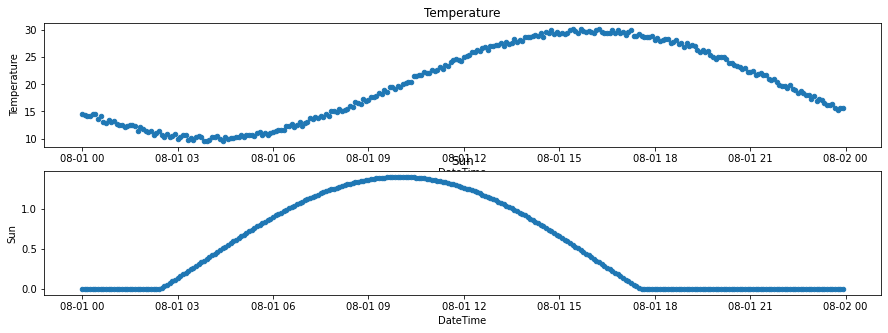

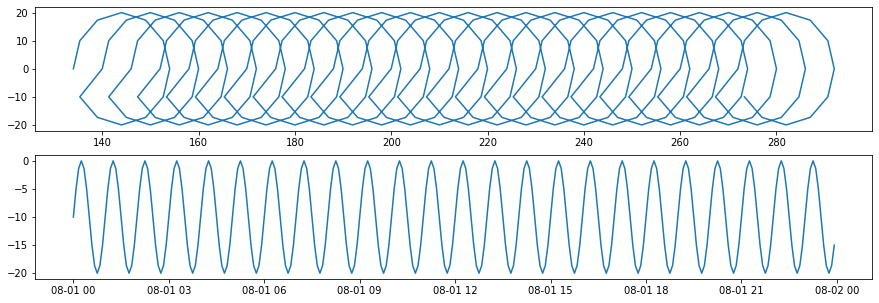

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,5)
plt.close("all")
fig, axes=plt.subplots(nrows=2,ncols=1)

T1=pd.read_excel('./data/FileOutT1.xlsx')  #Lectura de resultados excel
T1.plot(ax=axes[0],x='DateTime',y='Temperature',title='Temperature',kind='scatter')
S1=pd.read_excel('./data/FileOutS1.xlsx')  #Lectura de resultados excel
S1.plot(ax=axes[1],x='DateTime',y='Sun',title='Sun',kind='scatter')


P1=pd.read_excel('./data/FileOutP1.xlsx')
#fig,P1.plot(x='DateTime',y={'PosX','PosY','PosZ'},title='3D Position')
fig1=plt.figure()
axy ,adz = fig1.subplots(2,1)
axy.plot(P1.PosX,P1.PosY)
adz.plot(P1.DateTime,P1.PosZ)


In [4]:
# Test2 es una fusión de Telemtrías de dos ficehros, 
# uno de Posiciones 2D y otro de detección de Bloom y profundidad

from xdevs.sim import Coordinator
from edge.file import Test2
import datetime as dt

startdt=dt.datetime(2021,8,1,0,0,0)
enddt=dt.datetime(2021,8,2,0,0,0)
#enddt=dt.datetime(2021,8,3,0,0,0)
simseconds=(enddt-startdt).total_seconds()
coupled = Test2("ExampleBloomDetection", start=startdt, log=False)
coord = Coordinator(coupled, flatten=True)
print('Ini Simulación')
coord.initialize()
coord.simulate_time(simseconds)   #En segundos
coord.exit()
print('Fin Simulación')

Ini Simulación
Fin Simulación


<AxesSubplot:title={'center':'Bloom Detection'}, xlabel='DateTime', ylabel='DetBb'>

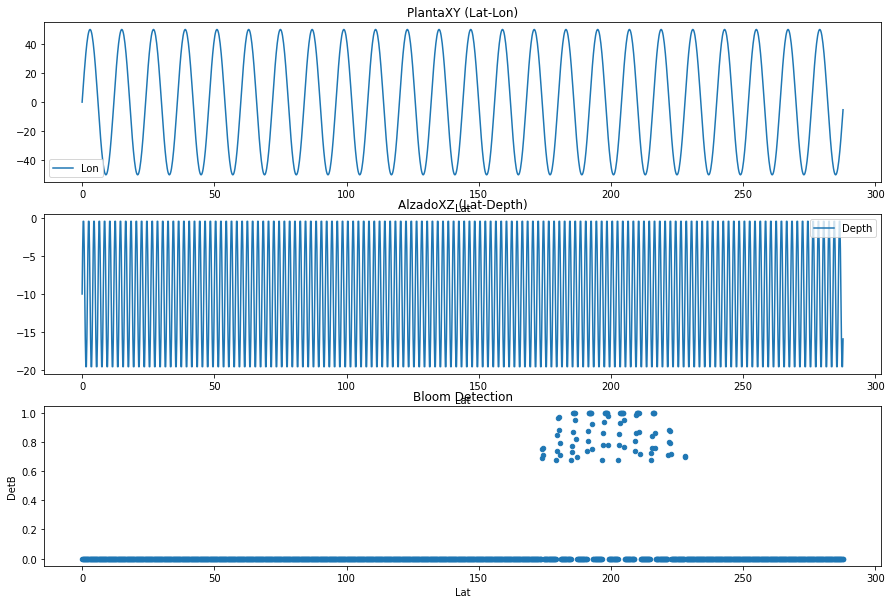

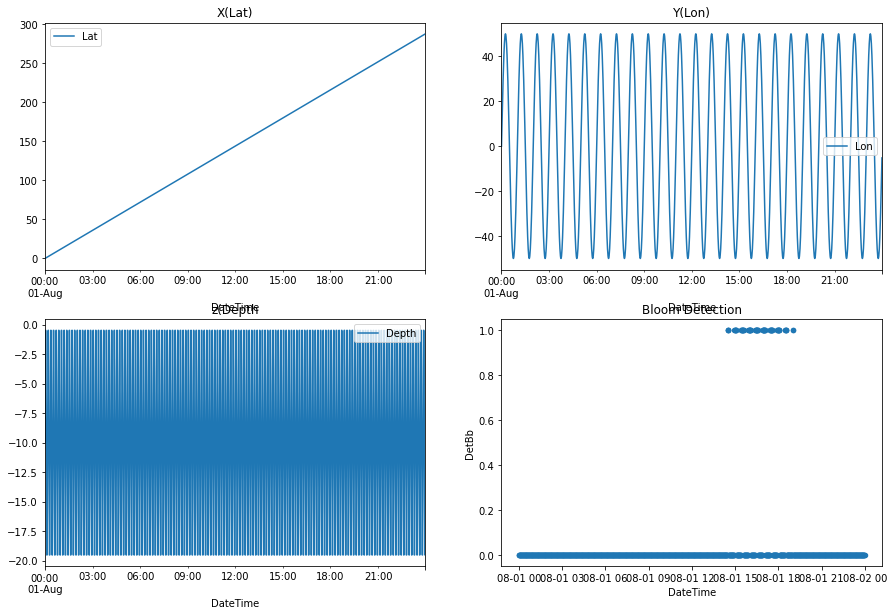

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15,10)
plt.close("all")
fig, axes=plt.subplots(nrows=3,ncols=1)

PB=pd.read_excel('./data/FileOutPOSBLOOM.xlsx')  #Lectura de resultados excel
PB.plot(ax=axes[0],x='Lat',y='Lon',title='PlantaXY (Lat-Lon)')
PB.plot(ax=axes[1],x='Lat',y='Depth',title='AlzadoXZ (Lat-Depth)')
PB.plot(ax=axes[2],x='Lat',y='DetB',title='Bloom Detection',kind='scatter')

fig, axes=plt.subplots(nrows=2,ncols=2)

#PB=pd.read_excel('./data/FileOutPOSBLOOM.xlsx')  #Lectura de resultados excel
PB.plot(ax=axes[0,0],x='DateTime',y='Lat',title='X(Lat)')
PB.plot(ax=axes[0,1],x='DateTime',y='Lon',title='Y(Lon)')
PB.plot(ax=axes[1,0],x='DateTime',y='Depth',title='z(Depth')
#PB.plot(ax=axes[1,1],x='DateTime',y='DetB',title='Bloom Detection',kind='scatter')
PB.plot(ax=axes[1,1],x='DateTime',y='DetBb',title='Bloom Detection',kind='scatter')

Otras representaciones


C:\Users\segu2\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  if sys.path[0] == '':


<function matplotlib.pyplot.show(close=None, block=None)>

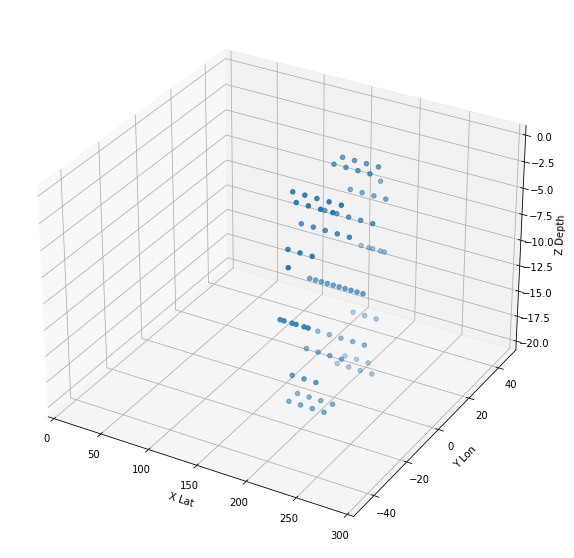

In [28]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
#fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.plot(PB.Lat, PB.Lon, PB.Depth, marker='o')
#ax.scatter(PB.Lat, PB.Lon, PB.Depth)
#ax.set_xlabel('X Lat')
#ax.set_ylabel('Y Lon')
#ax.set_zlabel('Z Depth')

fig = plt.figure()
ax1 = fig.gca(projection='3d')
x=PB[PB.DetBb==1].Lat
y=PB[PB.DetBb==1].Lon
z=PB[PB.DetBb==1].Depth
ax1.scatter(x, y, z)
ax1.set_xlabel('X Lat')
ax1.set_ylabel('Y Lon')
ax1.set_zlabel('Z Depth')
plt.xlim([0,300])
plt.ylim([-50,50])
#plt.zlim([-20,0])
plt.show